<a href="https://colab.research.google.com/github/Mohamedragih1/Breast-Cancer-Diagnose/blob/main/Breast_Cancer_Diagnose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##import important packages and the dataset

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#removing the label from dataset

In [ ]:
feat=df.drop('diagnosis', axis=1).copy()
feat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.isnull().values.any()

False

In [ ]:
scaler = StandardScaler()
feat = scaler.fit_transform(feat)

#implementing k_MEANS

In [ ]:
def kmeans(X, k):
    # Initialize centroids
    random_indices = np.random.choice(len(X), k, replace=False)
    centroids = X[random_indices]

    closest_centroid = np.zeros(len(X)).astype(int)

    max_iters = 100
    for _ in range(max_iters):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
        closest_centroid = np.argmin(distances, axis=1)
        # Update centroids based on the mean of assigned data points
        for i in range(k):
            centroids[i] = np.mean(X[closest_centroid == i], axis=0)

    return centroids, closest_centroid


#implementing PCA

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)


#implementing elbow method

In [ ]:
def calculate_wcss(X, centroids, closest_centroids):
    if isinstance(X, np.ndarray):
        wcss = np.sum((X - centroids[closest_centroids])**2)
    else:
        wcss = np.sum((X.to_numpy() - centroids[closest_centroids])**2)
    return wcss

In [ ]:
def plot_elbow_method(wcss_values,max_clusters=10):
  plt.plot(range(1,max_clusters+1),wcss_values,marker='o')
  plt.title('Elbow Method')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')
  plt.show()

#Experiment 1

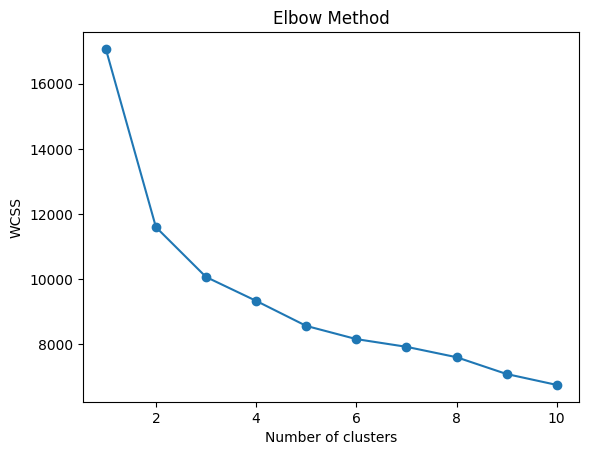

In [ ]:
max_clusters=10
wcss_values=[]
for i in range (1,max_clusters+1):
  centroids,closest_centroid=kmeans(feat,i)
  wcss=calculate_wcss(feat,centroids,closest_centroid)
  wcss_values.append(wcss)
#plotting the elbow method
plot_elbow_method(wcss_values)

In [ ]:
k = 2
centroids, labels=kmeans(feat,k)
wcss=calculate_wcss(feat,centroids,labels)

11595.526607115786


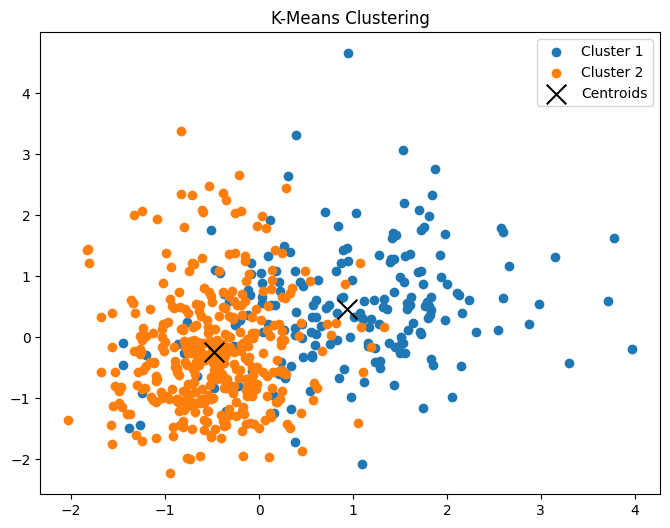

In [ ]:
k = 2
centroids, labels = kmeans(feat, k)
wcss = calculate_wcss(feat, centroids, labels)
print(wcss)
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(feat[labels == i, 0], feat[labels == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', label='Centroids', marker='x')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


#Experiment 2

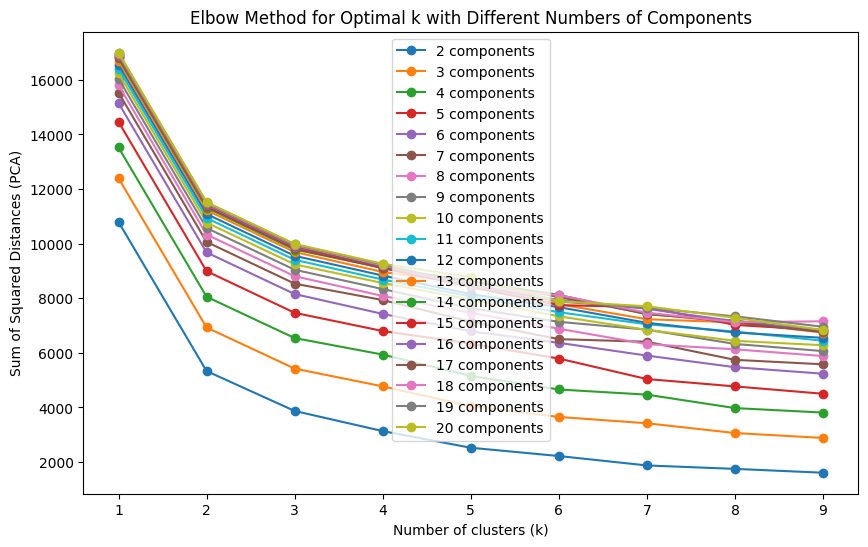

In [ ]:
# Define a range of numbers of principal components to try
num_components_range = range(2, 21)

# Initialize an empty list to store the sum of squared distances for each number of components
sse_components = []

# Apply PCA and K-Means clustering
for num_components in num_components_range:
    # Apply PCA to reduce dimensionality
    pca = PCA(n_components = num_components)
    # Fit the PCA model to the data
    pca.fit(feat)
    # Transform the data
    X_pca= pca.transform(feat)

    k_values = range(1, 10)
    sse_pca = []

    for k in k_values:
        centroids, labels = kmeans(X_pca, k)
        sum_squared_distances = np.sum((X_pca - centroids[labels]) ** 2)
        sse_pca.append(sum_squared_distances)

    sse_components.append(sse_pca)

# Plot the sum of squared distances for each number of components
plt.figure(figsize=(10, 6))
for i, sse_pca in enumerate(sse_components):
    plt.plot(k_values, sse_pca, marker='o', label=f'{num_components_range[i]} components')

plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (PCA)')
plt.title('Elbow Method for Optimal k with Different Numbers of Components')
plt.legend()
plt.show()


In [ ]:
k = 2
pca = PCA(n_components=2)
# Fit the PCA model to the data
pca.fit(feat)
# Transform the data using the learned components
X_best_pca_optimal = pca.transform(feat)

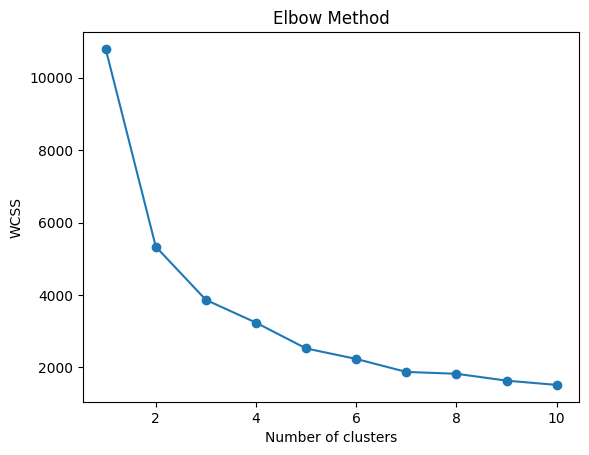

In [ ]:
max_clusters=10
wcss_values=[]
for i in range (1,max_clusters+1):
  centroids,closest_centroid=kmeans(X_best_pca_optimal,i)
  wcss=calculate_wcss(X_best_pca_optimal,centroids,closest_centroid)
  wcss_values.append(wcss)
#plotting elbow method
plot_elbow_method(wcss_values)

5332.555574203134


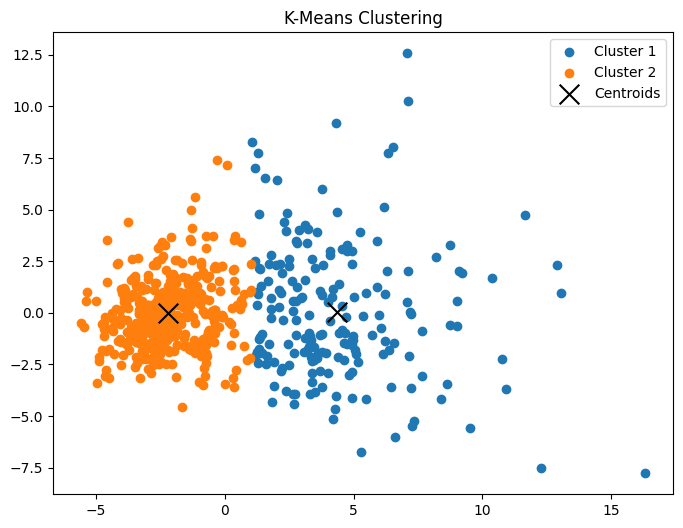

In [ ]:
best_centroids_optimal, best_labels_optimal = kmeans(X_best_pca_optimal, k)

# Calculate WCSS
wcss = calculate_wcss(X_best_pca_optimal, best_centroids_optimal, best_labels_optimal)
print(wcss)

# Plot the clusters and centroids
plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X_best_pca_optimal[best_labels_optimal == i, 0], X_best_pca_optimal[best_labels_optimal == i, 1], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(best_centroids_optimal[:, 0], best_centroids_optimal[:, 1], s=200, c='black', label='Centroids', marker='x')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

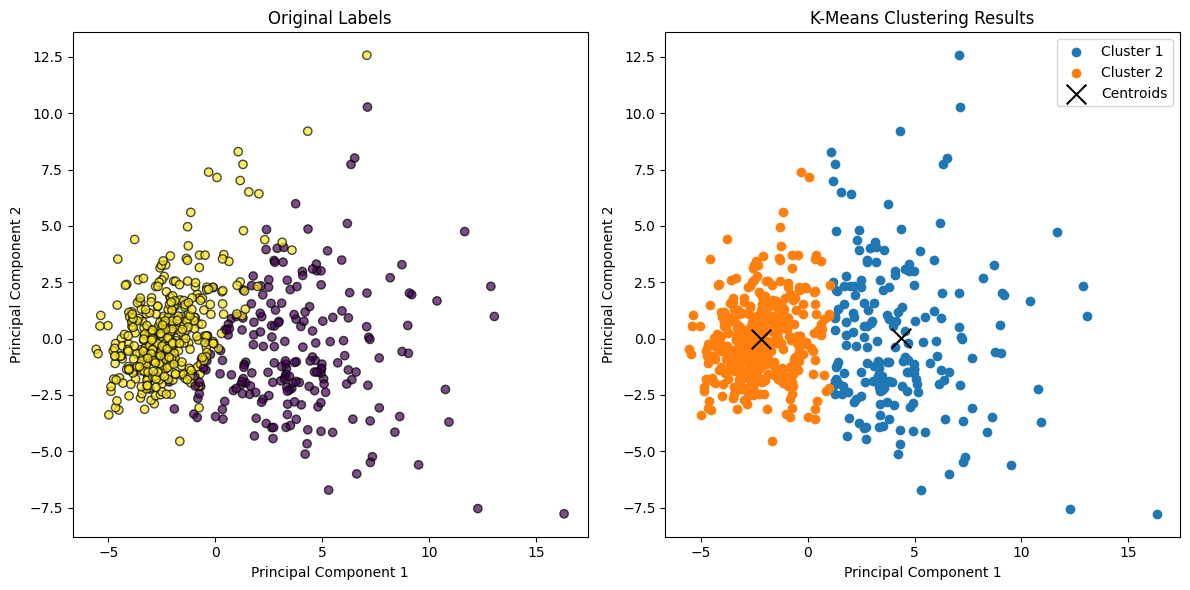

In [ ]:
# Visualize the original labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_best_pca_optimal[:, 0], X_best_pca_optimal[:, 1], c=df['diagnosis'].map({'M': 0, 'B': 1}), cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Original Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Visualize the K-Means clustering results
plt.subplot(1, 2, 2)
for i in range(k):
    plt.scatter(X_best_pca_optimal[best_labels_optimal == i, 0], X_best_pca_optimal[best_labels_optimal == i, 1],
                label=f'Cluster {i + 1}')
plt.scatter(best_centroids_optimal[:, 0], best_centroids_optimal[:, 1], s=200, c='black', label='Centroids', marker='x')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()
